In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import models, layers, regularizers, optimizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [55]:
df = pd.read_csv("./data/pulsar_stars.csv")

In [56]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [57]:
df.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [58]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260078550F0>,
      dtype=object)

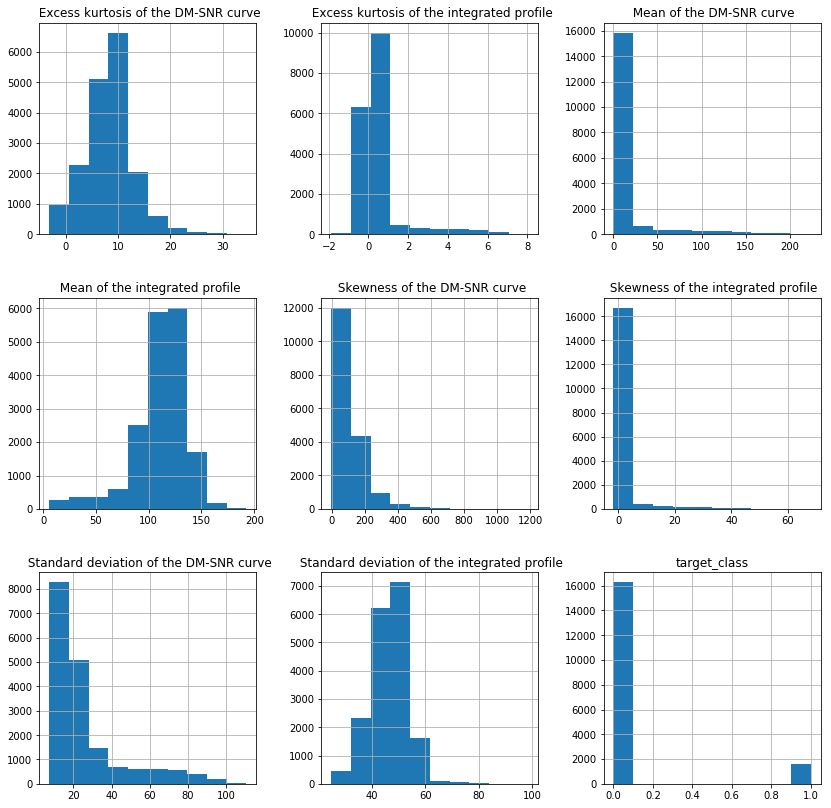

In [59]:
df.hist(figsize=(14,14))

In [60]:
X = df.drop("target_class", axis=1)
y = df.target_class
y.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
np.bincount(y)

array([16259, 16259], dtype=int64)

In [62]:
train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.25, shuffle=True)

In [63]:
print(train.shape, test.shape)

(24388, 8) (8130, 8)


In [64]:
avg, std = np.zeros(train.shape[1]), np.zeros(train.shape[1])

In [65]:
for i in range(train.shape[1]):
    avg[i] = np.mean(train[:,i])
    std[i] = np.std(train[:,i])
train_normalized = (train-avg)/std
test_normalized = (test-avg)/std

In [66]:
def build():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(train_normalized.shape[1],)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])
#     model.summary()
    
    return model

In [67]:
model = build()
model.summary()
len(model.layers)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                288       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)  

35

### Training on standardized data

In [68]:
history = model.fit(train_normalized, train_labels, epochs=50, batch_size=256, validation_split=0.1, verbose=False)

Instructions for updating:
Use tf.cast instead.


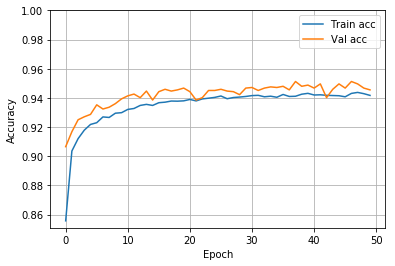

In [69]:
plt.plot(history.history['acc'], label='Train acc')
plt.plot(history.history['val_acc'], label='Val acc')
plt.legend()
plt.ylim(top=1.0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.show()

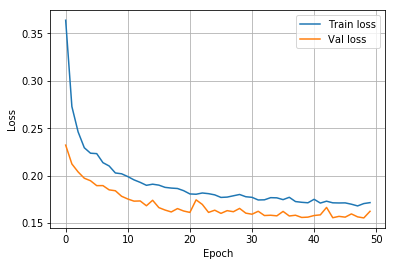

In [70]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

In [71]:
result = model.evaluate(test_normalized, test_labels, verbose=False)
train_result = model.evaluate(train_normalized, train_labels, verbose=0)

In [72]:
print("Train accuracy: ", train_result[1]*100, "\nTest accuracy: ", result[1]*100)

Train accuracy:  94.5054945054945 
Test accuracy:  94.39114391143912


In [73]:
model2 = build()

### Training on raw data

In [74]:
history2 = model2.fit(train, train_labels, epochs=50, batch_size=256, validation_split=0.1, verbose=False)

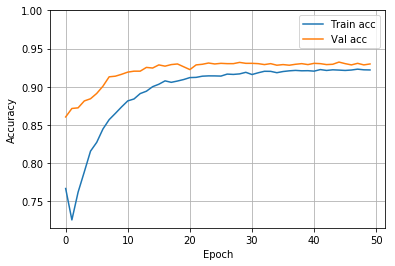

In [75]:
plt.plot(history2.history['acc'], label='Train acc')
plt.plot(history2.history['val_acc'], label='Val acc')
plt.legend()
plt.ylim(top=1.0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.show()

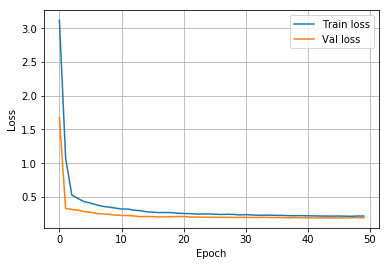

In [76]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Val loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

In [77]:
result = model2.evaluate(test, test_labels, verbose=False)
train_result = model2.evaluate(train, train_labels, verbose=0)

In [78]:
print("Train accuracy: ", train_result[1]*100, "\nTest accuracy: ", result[1]*100)

Train accuracy:  93.27948171231753 
Test accuracy:  92.77982779827798
